<a href="https://colab.research.google.com/github/Nungdoo/deep-learning-study/blob/main/exercise04_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단일층 신경망 구현하기

손실 함수의 결괏값 저장 기능 추가
- __init__()에서 손실 함수의 결괏값을 저장할 리스트 self.losses 초기화
- 샘플마다 손실 함수를 계산하고 그 평균값을 self.losses 에 저장

에포크마다 샘플 순서 섞기
- np.random.permutation() 함수를 사용하여 indexes 배열을 생성하고 이 순서에 따라 훈련
- np.random.permutation() : 입력 배열을 무작위로 섞은 새로운 배열을 반환
- np.random.suffle() : 입력 배열을 무작위로 섞음

predict() 함수 수정
- 시그모이드 함수의 출력값(a)은 0~1 사이의 확률값
- z가 0보다 크면 a도 0.5보다 크고, z가 0보다 작으면 a도 0.5보다 작아 predict() 함수에서 굳이 a를 활용하지 않아도 됨

정확도 계산 함수 추가 - score()
- np.mean() : 입력 배열을 평면화 된 배열로 취급하고 이 배열의 산술 평균을 계산

In [1]:
import numpy as np

class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞음
      for i in indexes:
        z = self.forpass(x[i])   # 정방향 계산
        a = self.activation(z)  # 활성화 함수 적용
        err = -(y[i] - a)        # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= w_grad
        self.b -= b_grad

        # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      # 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    # a = self.activation(np.array(z))
    # return a > 0.5
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)


# 단일층 신경망 훈련하기

데이터 준비

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

훈련하기

In [5]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

손실 함수 누적값 확인하기

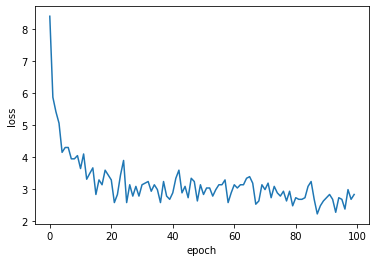

In [6]:
import matplotlib.pyplot as plt

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()